<a href="https://colab.research.google.com/github/Nitti-Sharma/C21RealEstateRealtyIncBrokerage_PricePredictor_ML/blob/main/House_Price_Prediction__Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all the Libraries 


In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 

Importing Boston House Price DataSet 

In [13]:
#DataSet 

HousePrice__Dataset = pd.read_csv('/content/HousingData_RealEstate.csv')

In [14]:
HousePrice__Dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# New Section

# New Section

In [15]:
# Number of rows and Columns in this dataset 
HousePrice__Dataset.shape

(506, 14)

In [16]:
# Number of rows and Columns in this dataset 
HousePrice__Dataset.shape

(506, 14)

In [17]:
#Loading the dataset to a Pandas DataFrame 

HousePriceDataframe = pd.DataFrame(HousePrice__Dataset)
print(HousePriceDataframe)



        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8

In [18]:
# Find the sum of the Null Values 

HousePriceDataframe.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

In [19]:
#Statistical Measure of the Dataset 

HousePriceDataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


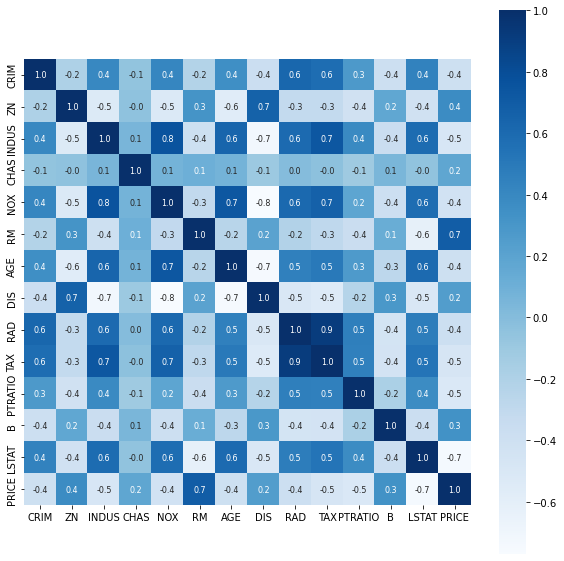

In [22]:
# Correlation between Various Features 

correlation = HousePriceDataframe.corr()

# Using Heatmap in order to understand the Correlation between the various features 

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [27]:
# Splitting the Price from the Whole DataSet as Price is the Label that needs to be predicted 

X = HousePriceDataframe.drop(['PRICE'], axis=1)
Y = HousePriceDataframe ['PRICE']

print (X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Splitting Data into Train and Test Data 

In [29]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [30]:
 ## Model Training 
 # XGBoost Regressor 

 # loading the model
model = XGBRegressor()
model.fit(X_train, Y_train)

[17:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation 

In [33]:
# Prediction on Training Data 
Training_Data_Prediction = model.predict(X_train)
print(Training_Data_Prediction)

[23.597145  22.287445  19.869503  34.11404   15.465733  13.587374
 22.187574  15.378614  11.298271  21.440725  15.069266   7.02094
 30.156584  48.044125  32.770546  20.512573  22.606705  20.883598
 31.684935  19.957829  26.155588   7.8529816 45.534378  22.238571
 20.636963  19.969599  20.105528  25.561321  23.281834  32.20675
 21.511713   8.993896  18.469196  21.268934  12.83876   13.271249
 13.792728  23.500288  18.477896  15.869361  24.063597  26.694382
 15.828356  18.129911  15.871397  13.581852  24.862724  18.041279
 49.833088  17.206179  21.463766  33.395306  16.395489  22.382292
 21.120329  20.622038  22.678526  37.198498  31.037794  32.994267
 20.522318  47.321957  14.364013   6.8324757 19.588964   9.40625
 27.144241  17.493402  20.59991   45.958694  40.76352   34.146397
 22.454119  34.270145  25.002235  50.391445  13.991356  20.349062
 20.53635   23.1785    49.749866  23.367384  24.796814  20.248959
 44.00508   16.772163  32.56804   35.2491     7.013697  20.357256
 18.541948  1

In [36]:
# R Squared Error 
Score_1 = metrics.r2_score(Y_train,Training_Data_Prediction)
# Mean Absolute Error 
Score_2 = metrics.mean_absolute_error(Y_train, Training_Data_Prediction)
print('R Squared Error', Score_1)
print('Mean Absolute Error : ', Score_2)

R Squared Error 0.9747089439896925
Mean Absolute Error :  1.1224135828490305


Visualizing the Actual Prices and Predicted Ones

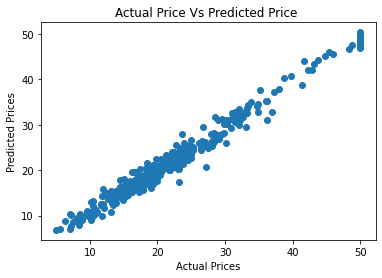

In [37]:
plt.scatter(Y_train,Training_Data_Prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Price ")
plt.show()

# Prediction  on Test Data 

In [40]:
# Accuracy  for Prediction  on Test Data 
Test_Data_Prediction = model.predict(X_test)

In [42]:
# R squared error
score_1 = metrics.r2_score(Y_test, Test_Data_Prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, Test_Data_Prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8860974204192777
Mean Absolute Error :  2.136066087086995
